# Проект: Принятие решений в бизнесе

## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Часть 1. Приоритизация гипотез.**

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**

Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
10. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
11. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

# Описание данных

Данные для первой части

**Файл /datasets/hypothesis.csv.**
- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

**Файл /datasets/orders.csv.**
- **transactionId** — идентификатор заказа;
- **visitorId** — идентификатор пользователя, совершившего заказ;
- **date** — дата, когда был совершён заказ;
- **revenue** — выручка заказа;
- **group** — группа A/B-теста, в которую попал заказ.

**Файл /datasets/visitors.csv.**
- **group** — группа A/B-теста;
- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as st

## Часть 1. Приоритизация гипотез.

### Загрузка файла с данными и изучение общей информации

In [2]:
try:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.columns = [name.lower() for name in hypothesis.columns]

### Фреймворк ICE

<br>

$$ICE = \frac{Impact * Confidence}{Efforts}$$

<br>

In [5]:
hypothesis['ICE'] = (
    hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
).round(2)

hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


### Фреймворк RICE

<br>

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

<br>

In [6]:
hypothesis['RICE'] = (
    hypothesis['reach'] * hypothesis['ICE']
)

hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.00
2,Добавить блоки рекомендаций товаров на сайт ин...,56.00
6,Показать на главной странице баннеры с актуаль...,40.00
0,"Добавить два новых канала привлечения трафика,...",39.99
8,"Запустить акцию, дающую скидку на товар в день...",16.20
3,"Изменить структура категорий, что увеличит кон...",8.96
1,"Запустить собственную службу доставки, что сок...",4.00
5,"Добавить страницу отзывов клиентов о магазине,...",3.99
4,"Изменить цвет фона главной страницы, чтобы уве...",3.00


### Вывод

In [7]:
pd.options.display.max_colwidth = 100

hypothesis[['hypothesis','ICE','RICE']].sort_values('RICE', ascending=False).\
style.highlight_max(color='lightgreen').highlight_min(color='#cd4f39')

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000,39.990000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000,8.960000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000,3.990000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000


Заметно увеличился приоритет RICE относительно ICE гипотез 7, 2, 6 и 3. Это связано с высоким охватом пользователей. Гипотеза 2 переместилась с пятой позиции на вторую, гипотеза 3 с девятой - на седьмую. Наибольший приоритет имеет седьмая гипотеза.

## Часть 2. Анализ A/B-теста

### Загрузка файлов с данными и изучение общей информации

In [8]:
try:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
def first_view(df):
    df.columns = [name.lower().replace(' ', '_') for name in df.columns]
    display(df.head())
    df.info()
    print('*'*50)
    for column in df:
        print('Столбец {}'.format(column))
        print(df[column].value_counts().head())
        print(df[column].describe())
        print('Пропусков в столбце: {}'.format(df[column].isna().sum()))
        print('*'*50)
      
    print('Дубликатов в таблице:', df.duplicated().sum())

In [10]:
first_view(orders)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
**************************************************
Столбец transactionid
1658608862    1
2211880073    1
3913205113    1
437656952     1
3592105335    1
Name: transactionid, dtype: int64
count    1.197000e+03
mean     2.155621e+09
std      1.229085e+09
min      1.062393e+06
25%      1.166776e+09
50%      2.145194e+09
75%      3.237740e+09
max      4.293856e+09
Name: transactionid, dtype: float64
Пропусков в столбце: 0
**************************************************
Столбец visitorid
4256040402    11
2458001652    11
2378935119     9


In [11]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
first_view(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
**************************************************
Столбец date
2019-08-21    2
2019-08-14    2
2019-08-04    2
2019-08-05    2
2019-08-16    2
Name: date, dtype: int64
count             62
unique            31
top       2019-08-21
freq               2
Name: date, dtype: object
Пропусков в столбце: 0
**************************************************
Столбец group
A    31
B    31
Name: group, dtype: int64
count     62
unique     2
top        A
freq      31
Name: group, dtype: object
Пропусков в столбце: 0
**************************************************
Столбец visitors
610    2
718    2
654    2
490    2
609    1
Name: visitors, dtype: int64
count

In [13]:
 visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

С данными предварительно все в порядке, пропусков нет. Привели названия столбцов к нижнему регистру, изменили тип данных столбцов с датой.

### График кумулятивной выручки по группам

In [14]:
dates_groups = orders[['date', 'group']].drop_duplicates()

orders_agg = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'],
            orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_agg = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'],
            visitors['group'] == x['group']
        )
    ].agg({'date': 'max',
           'group': 'max',
           'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cum_data = orders_agg.merge(
    visitors_agg, left_on=['date', 'group'],
    right_on=['date', 'group']
)
cum_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

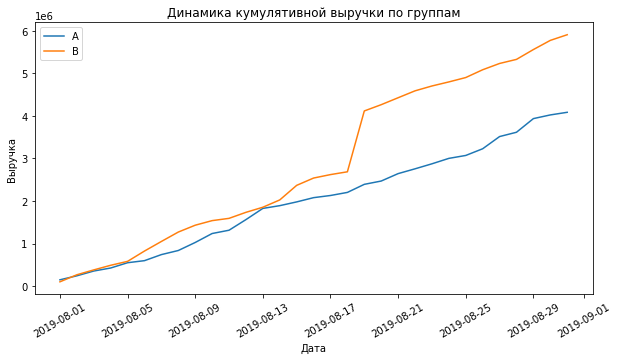

In [15]:
cum_revenue_a = cum_data[cum_data['group']=='A'][
    ['date','revenue', 'orders']
]

cum_revenue_b = cum_data[cum_data['group']=='B'][
    ['date','revenue', 'orders']
]
plt.figure(figsize=(10,5))

plt.plot(cum_revenue_a['date'],
         cum_revenue_a['revenue'],
         label='A')

plt.plot(cum_revenue_b['date'],
         cum_revenue_b['revenue'],
         label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.title('Динамика кумулятивной выручки по группам')
plt.legend()
plt.show()

**Вывод:** 

Выручка почти равномерно увеличивается в течение всего теста. Выручка по группе B стабильно немного выше. За исключением одного резкого скачка. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в группе B. Проверим это позже.

### График кумулятивного среднего чека по группам

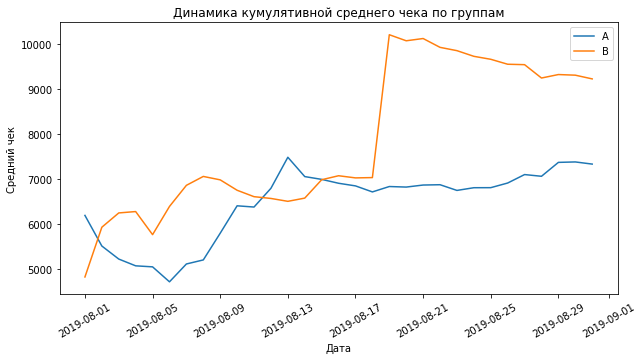

In [16]:
plt.figure(figsize=(10,5))

plt.plot(cum_revenue_a['date'],
         cum_revenue_a['revenue']/cum_revenue_a['orders'],
         label='A')

plt.plot(cum_revenue_b['date'],
         cum_revenue_b['revenue']/cum_revenue_b['orders'],
         label='B')


plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.title('Динамика кумулятивной среднего чека по группам')
plt.legend()
plt.show()

**Вывод:** 

Средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B во второй половине теста попали крупные заказы (резкий всплеск на графике). Группе B нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### График относительного изменения кумулятивного среднего чека группы B к группе A

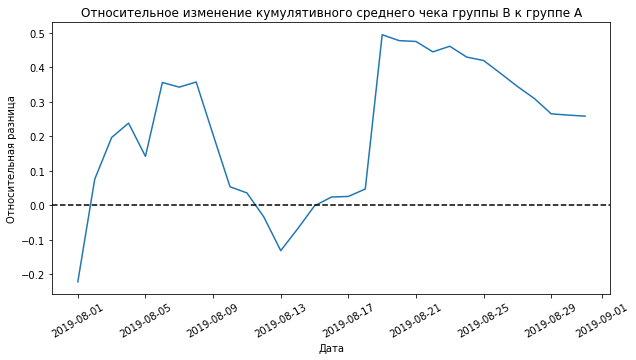

In [17]:
merged_cum_revenue = cum_revenue_a.merge(
    cum_revenue_b, left_on='date', right_on='date', 
how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))

plt.plot(merged_cum_revenue['date'],
         (merged_cum_revenue['revenueB']/merged_cum_revenue['ordersB'])/
        (merged_cum_revenue['revenueA']/merged_cum_revenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 

plt.ylabel('Относительная разница')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.title('Относительное изменениe кумулятивного среднего чека группы B к группе A')
plt.show()

**Вывод:**

В нескольких точках график различия между сегментами резко «скачет». Это говорит о том что есть крупные заказы, выбросы. Они и создают эти скачки. Найдём их позже.

### График кумулятивного среднего количества заказов на посетителя по группам

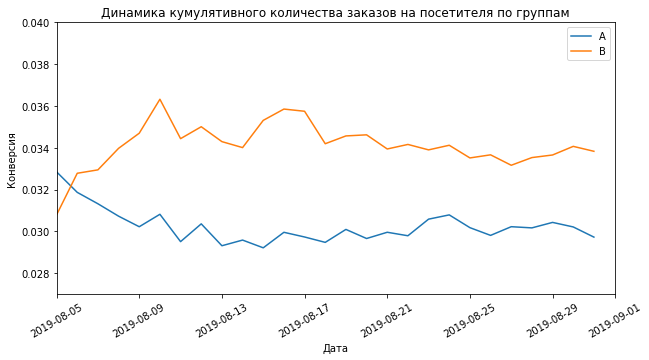

In [18]:
cum_data['conversion'] = cum_data['orders']/cum_data['visitors']

cum_data_a = cum_data[cum_data['group']=='A']
cum_data_b = cum_data[cum_data['group']=='B']

plt.figure(figsize=(10,5))

plt.plot(cum_data_a['date'], cum_data_a['conversion'], label='A')
plt.plot(cum_data_b['date'], cum_data_b['conversion'], label='B')
plt.axis([dt.datetime(2019, 8, 5), dt.datetime(2019, 9, 1), 0.027, 0.04])
plt.legend()

plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.title('Динамика кумулятивного количества заказов на посетителя по группам')
plt.show()

**Вывод:**

Графики колеблются, к концу теста колебания уменьшаются, но еще не стабилизировались. Количество заказов на пользователя группы B стабильно выше.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

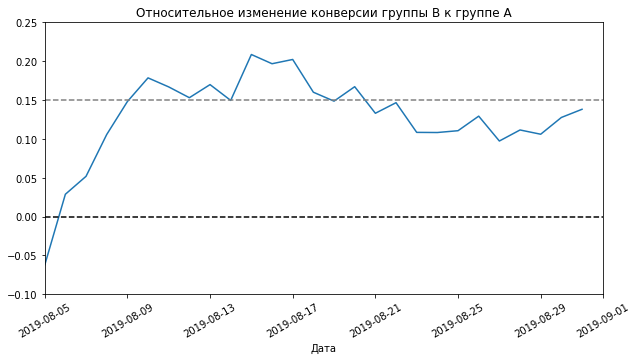

In [19]:
merged_сum_сonversions = cum_data_a[
    ['date', 'conversion']].merge(
cum_data_b[
    ['date', 'conversion']], left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

plt.figure(figsize=(10,5))

plt.plot(
    merged_сum_сonversions['date'],
    merged_сum_сonversions['conversionB']/merged_сum_сonversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 5), dt.datetime(2019, 9, 1), -0.1, 0.25])

plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.title('Относительное изменение конверсии группы B к группе A')
plt.show()

**Вывод:**

Почти с самого начала теста группа B лидирует по конверсии. В начале теста есть сильный скачок. Разница растет до 20% к середине теста, затем снижается до 10% и стремится примерно к 15%.

### Точечный график количества заказов по пользователям

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


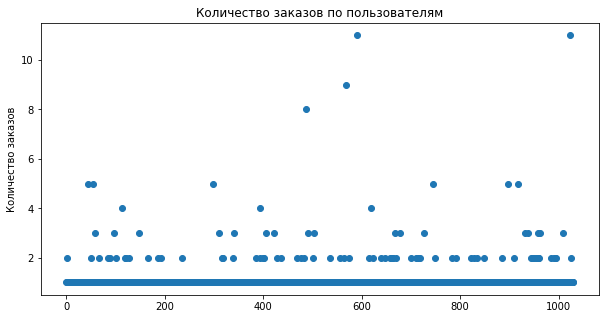

In [20]:
orders_by_users = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
orders_by_users.columns = ['visitorid', 'orders']

display(orders_by_users.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(10,5))

plt.scatter(x_values, orders_by_users['orders'])

plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')
plt.show()

**Вывод:**

Есть немного пользователей с большим количеством заказов. По графику можно выбрать границу аномального количества заказов между 2 и 4. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. Дальше посмотрим какое количество заказов находится на этих перцентилях.

### 95-й и 99-й перцентили количества заказов на пользователя

In [21]:
display(orders_by_users.sort_values(by='orders', ascending=False).head(10))

print('95-й перцентиль количества заказов на пользователя: {}'.format(
    np.percentile(orders_by_users['orders'], 95)))
print('99-й перцентиль количества заказов на пользователя: {}'.format(
    np.percentile(orders_by_users['orders'], 99)))

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


95-й перцентиль количества заказов на пользователя: 2.0
99-й перцентиль количества заказов на пользователя: 4.0


**Вывод:**

На удивление точно попали в перцентили на основании графика. Будем считать аномальным количество заказов больше 2.

### Точечный график стоимостей заказов

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


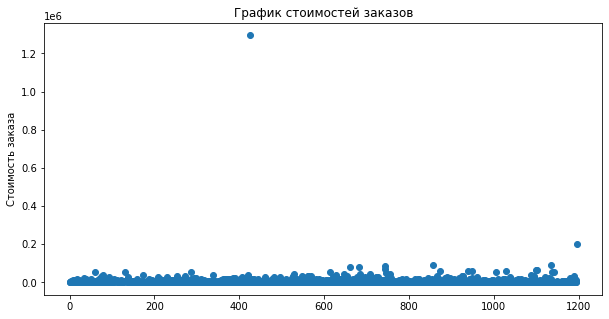

In [22]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10,5))

plt.scatter(x_values, orders['revenue'])

plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.show()

**Вывод:**

Есть один очень большой заказ, из-за него сложно понять примерные границы аномальной стоимости заказа. По графику можно сказать что почти все заказы расположены в интервале 0 - 100000. Посмортим далее какие значения находятся на 95-й и 99-й перцентили.

### 95-й и 99-й перцентили стоимости заказов

In [23]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

print('95-й перцентиль стоимости заказов: {}'.format(
    np.percentile(orders['revenue'], 95).round(2)))
print('99-й перцентиль стоимости заказов: {}'.format(
    np.percentile(orders['revenue'], 99).round(2)))

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


95-й перцентиль стоимости заказов: 28000.0
99-й перцентиль стоимости заказов: 58233.2


**Вывод:**

Больше 28000 всего 5% заказов и 1% заказов превышают сумму 58233. Отсекать как выбросы будем заказы, которые дороже 28000.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [24]:
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitorsPerDateA']

visitors_cum_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitors_cum_a.columns = ['date', 'visitorsCummulativeA']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitorsPerDateB']

visitors_cum_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitors_cum_b.columns = ['date', 'visitorsCummulativeB']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

orders_cum_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cum_a.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

orders_cum_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_daily_b.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cum_a, left_on='date', right_on='date', how='left')
    .merge(orders_cum_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cum_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cum_b, left_on='date', right_on='date', how='left')
)

display(data.head(5))

orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitorid', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitorid', 'orders']

,date,ordersPerDateA,revenuePerDateA,ordersCummulativeB,revenueCummulativeB,ordersCummulativeA,revenueCummulativeA,ordersPerDateB,revenuePerDateB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [25]:
visitors_daily_a

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756
5,2019-08-06,667
6,2019-08-07,644
7,2019-08-08,610
8,2019-08-09,617
9,2019-08-10,406


In [26]:
sample_a = pd.concat(
    [orders_by_users_a['orders'],
     pd.Series(0,
               index=np.arange(
                   data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])),
               name='orders',
              ),
    ],
    axis=0)

sample_b = pd.concat(
    [orders_by_users_b['orders'],
     pd.Series(0,
               index=np.arange(
                   data['visitorsPerDateB'].sum() - len(orders_by_users_b['orders'])),
               name='orders',
              ),
    ],
    axis=0)

<div style="border:solid green 2px; padding: 20px">
    
**Нулевая гипотеза:** различий в среднем количестве заказов на посетителя между группами нет.

**Альтернативная гипотеза:** между группами есть статистически значимая разница в среднем количестве заказов на посетителя.


In [27]:
def mw_test(sample1, sample2):
    print('p-value {0:.3f}'.format(
    st.mannwhitneyu(sample1, sample2)[1]))

    print('Относительный прирост группы B к группе A: {0:.3f}'.format(
    sample2.mean()/sample1.mean()-1)) 

In [28]:
mw_test(sample_a, sample_b)

p-value 0.017
Относительный прирост группы B к группе A: 0.138


**Вывод:**

По «сырым» данным различие в среднем количестве заказов групп A и B есть.

p-value = 0.017, это меньше 0.05. Поэтому принять нулевую гипотезу о равенстве групп мы не можем. Показатель группы B, относительно группы A выше почти на 14%. 

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

<div style="border:solid green 2px; padding: 20px">

**Нулевая гипотеза:** различий в среднем чеке заказа между группами нет.

**Альтернативная гипотеза:** между группами есть статистически значимая разница в среднем чеке заказа.


In [29]:
sample_a = orders[orders['group']=='A']['revenue']
sample_b = orders[orders['group']=='B']['revenue']

In [30]:
mw_test(sample_a, sample_b)

p-value 0.729
Относительный прирост группы B к группе A: 0.259


**Вывод:**

По «сырым» данным различий в среднем чеке групп A и B нет.
p-value = 0.729 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказов между группами нет, не отвергаем. Здесь показатель группы B снова выше, относительно группы A, только уже на 25.9%

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [31]:
abnormal_users = (pd.concat(
    [pd.concat(
        [orders_by_users_a[orders_by_users_a['orders'] > 2]['visitorid'],
         orders_by_users_b[orders_by_users_b['orders'] > 2]['visitorid']],
        axis=0
    ),
     orders[orders['revenue'] > 28000]['visitorid']],
    axis=0
).drop_duplicates().sort_values())

print('Количество "аномальных" пользователей {}'.format(len(abnormal_users)))
print(abnormal_users.head(5))

Количество "аномальных" пользователей 74
1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64


Составили список аномальных пользователей, в него вошло 74 id.

<div style="border:solid green 2px; padding: 20px">
    
**Нулевая гипотеза:** различий в среднем количестве заказов на посетителя между группами нет.

**Альтернативная гипотеза:** между группами есть статистически значимая разница в среднем количестве заказов на посетителя.


In [32]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitorid'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


sample_b_filtered = pd.concat([orders_by_users_b[
            np.logical_not(orders_by_users_b['visitorid'].isin(abnormal_users))
        ]['orders'],pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

mw_test(sample_a_filtered, sample_b_filtered)

p-value 0.013
Относительный прирост группы B к группе A: 0.173


**Вывод:**

После фильтрации p-value практически не изменился, статистически значимая разница в среднем количестве заказов между группами осталась. Относительный прирост группы B немного изменился: с 13.8% до 17.3%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

<div style="border:solid green 2px; padding: 20px">

**Нулевая гипотеза:** различий в среднем чеке заказа между группами нет.

**Альтернативная гипотеза:** между группами есть статистически значимая разница в среднем чеке заказа.

In [33]:
sample_a_filtered = orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue']

sample_b_filtered = orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue']

mw_test(sample_a_filtered, sample_b_filtered)

p-value 0.738
Относительный прирост группы B к группе A: -0.020


Здесь так же p-value практически не изменился. Статистически значимой разницы между группами после фильтрации не появилось. Однако после фильтрации средний чек выше уже у группы A на 2%. До фильтрации был выше у группы B на 26%.

### Вывод

На **этапе предобработки** проблем с данными не обнаружили, исправили только тип данных столбцов с датами в обеих таблицах.

**По выручке:** Выручка почти равномерно увеличивается в течение всего теста. Выручка по группе B стабильно немного выше. За исключением одного резкого скачка. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в группе B.

**По среднему чеку:** 
- Средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B во второй половине теста попали крупные заказы (резкий всплеск на графике). Группе B нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. 
- В нескольких точках график относительного изменения резко «скачет». Это говорит о том что есть крупные заказы, выбросы. Они и создают эти скачки.
- Есть один очень большой заказ, из-за него сложно понять примерные границы аномальной стоимости заказа. По точечному графику стоимостей заказов можно сказать что почти все заказы расположены в интервале 0 - 100000. На 95-й и 99-й перцентилях находятся значения 28000.0 и 58233.2 соответственно.

**По среднему количеству заказов на пользователя:** 
- Графики среднего количества заказов на пользователя колеблются, к концу теста колебания уменьшаются, но еще не стабилизировались. Количество заказов на пользователя группы B стабильно выше. 
- Почти с самого начала теста группа B лидирует по количеству заказов. В начале теста есть сильный скачок. Разница растет до 20% к середине теста, затем снижается до 10% и стремится примерно к 15%. 
- Есть немного пользователей с большим количеством заказов. По точечному графику можно выбрать границу аномального количества заказов между 2 и 4. Эти же показатели находятся на 95-й и 99-й перцентилях соответственно. 

**По сырым данным:**
- Различие в среднем количестве заказов групп A и B есть. p-value = 0.017, это меньше 0.05. Поэтому принять нулевую гипотезу о равенстве групп мы не можем. Показатель группы B, относительно группы A выше почти на 14%.
- Различий в среднем чеке групп A и B нет. p-value = 0.729 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказов между группами нет, не отвергаем. Здесь показатель группы B снова выше, относительно группы A, только уже на 25.9%

**Границы для фильтрации** установили такие:
- Стоимость заказа не выше 28000
- Не больше двух заказов у пользователя

**По данным после фильтрации:**
- p-value практически не изменился, статистически значимая разница в среднем количестве заказов между группами осталась. Относительный прирост группы B немного изменился: с 13.8% до 17.3%.
- Здесь так же p-value практически не изменился. Статистически значимой разницы в среднем чеке между группами после фильтрации не появилось. Однако после фильтрации средний чек выше уже у группы A на 2%. До фильтрации был выше у группы B на 26%.

## Общий вывод

По результатам анализа можно принять решение об остановке теста и зафиксировать победу группы B. Хоть и разницы в среднем чеке между группами практически нет, среднее количество заказов на пользователя выше у группы B на 17.3%. Соответственно выручка выше у группы B.